# Dimensionality Reduction

<a href="?print-pdf">print view</a>  
<a href="lecture17-dimred-1.ipynb" download>notebook</a>

# Introduction

## What is dimensionality reduction
- Input Data can have have very high dimension (e.g. gene expression data)
- **Dimensionality reduction** is the framework for representing high-dimensional data using a lower number of features (dimensions) *while* ensuring that original data’s meaningful properties are still captured.

## Why perform dimensionality reduction
- Fewer features require less number of parameters to learn a model while avoiding overfitting
- Easy to visualize data
- Understand the inherent (intrinsic dimensionality) of the data.

## An Example

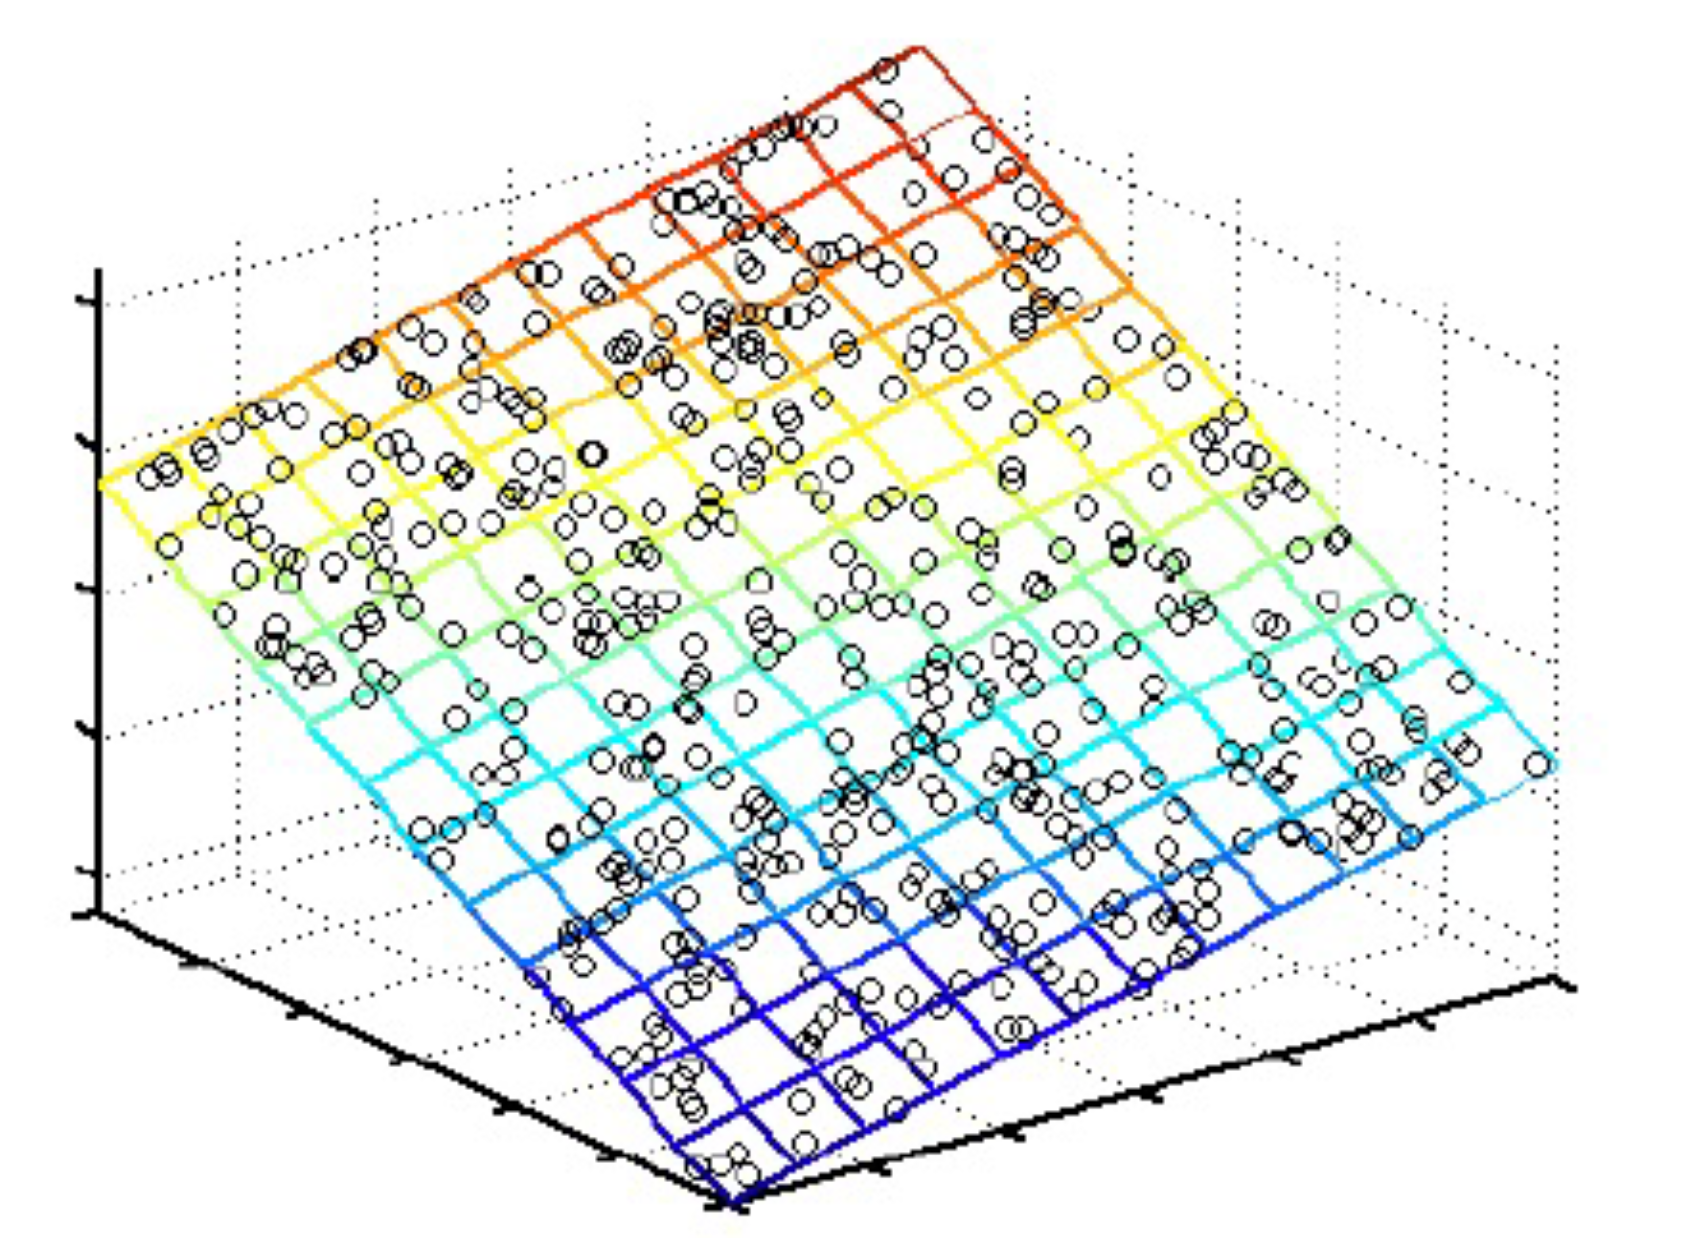

# What are the different types of dimensionality reduction approaches
## Linear
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)
## Non-Linear
- t-distributed stochastic neighbor embedding (t-SNE)
- Uniform manifold approximation and projection (UMAP)

## PRINCIPAL COMPONENT ANALYSIS 

Principal component analysis finds an orthogonal basis that best represents the variance in the data.

<img width="400" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1280px-GaussianScatterPCA.svg.png">

# Example Revisited

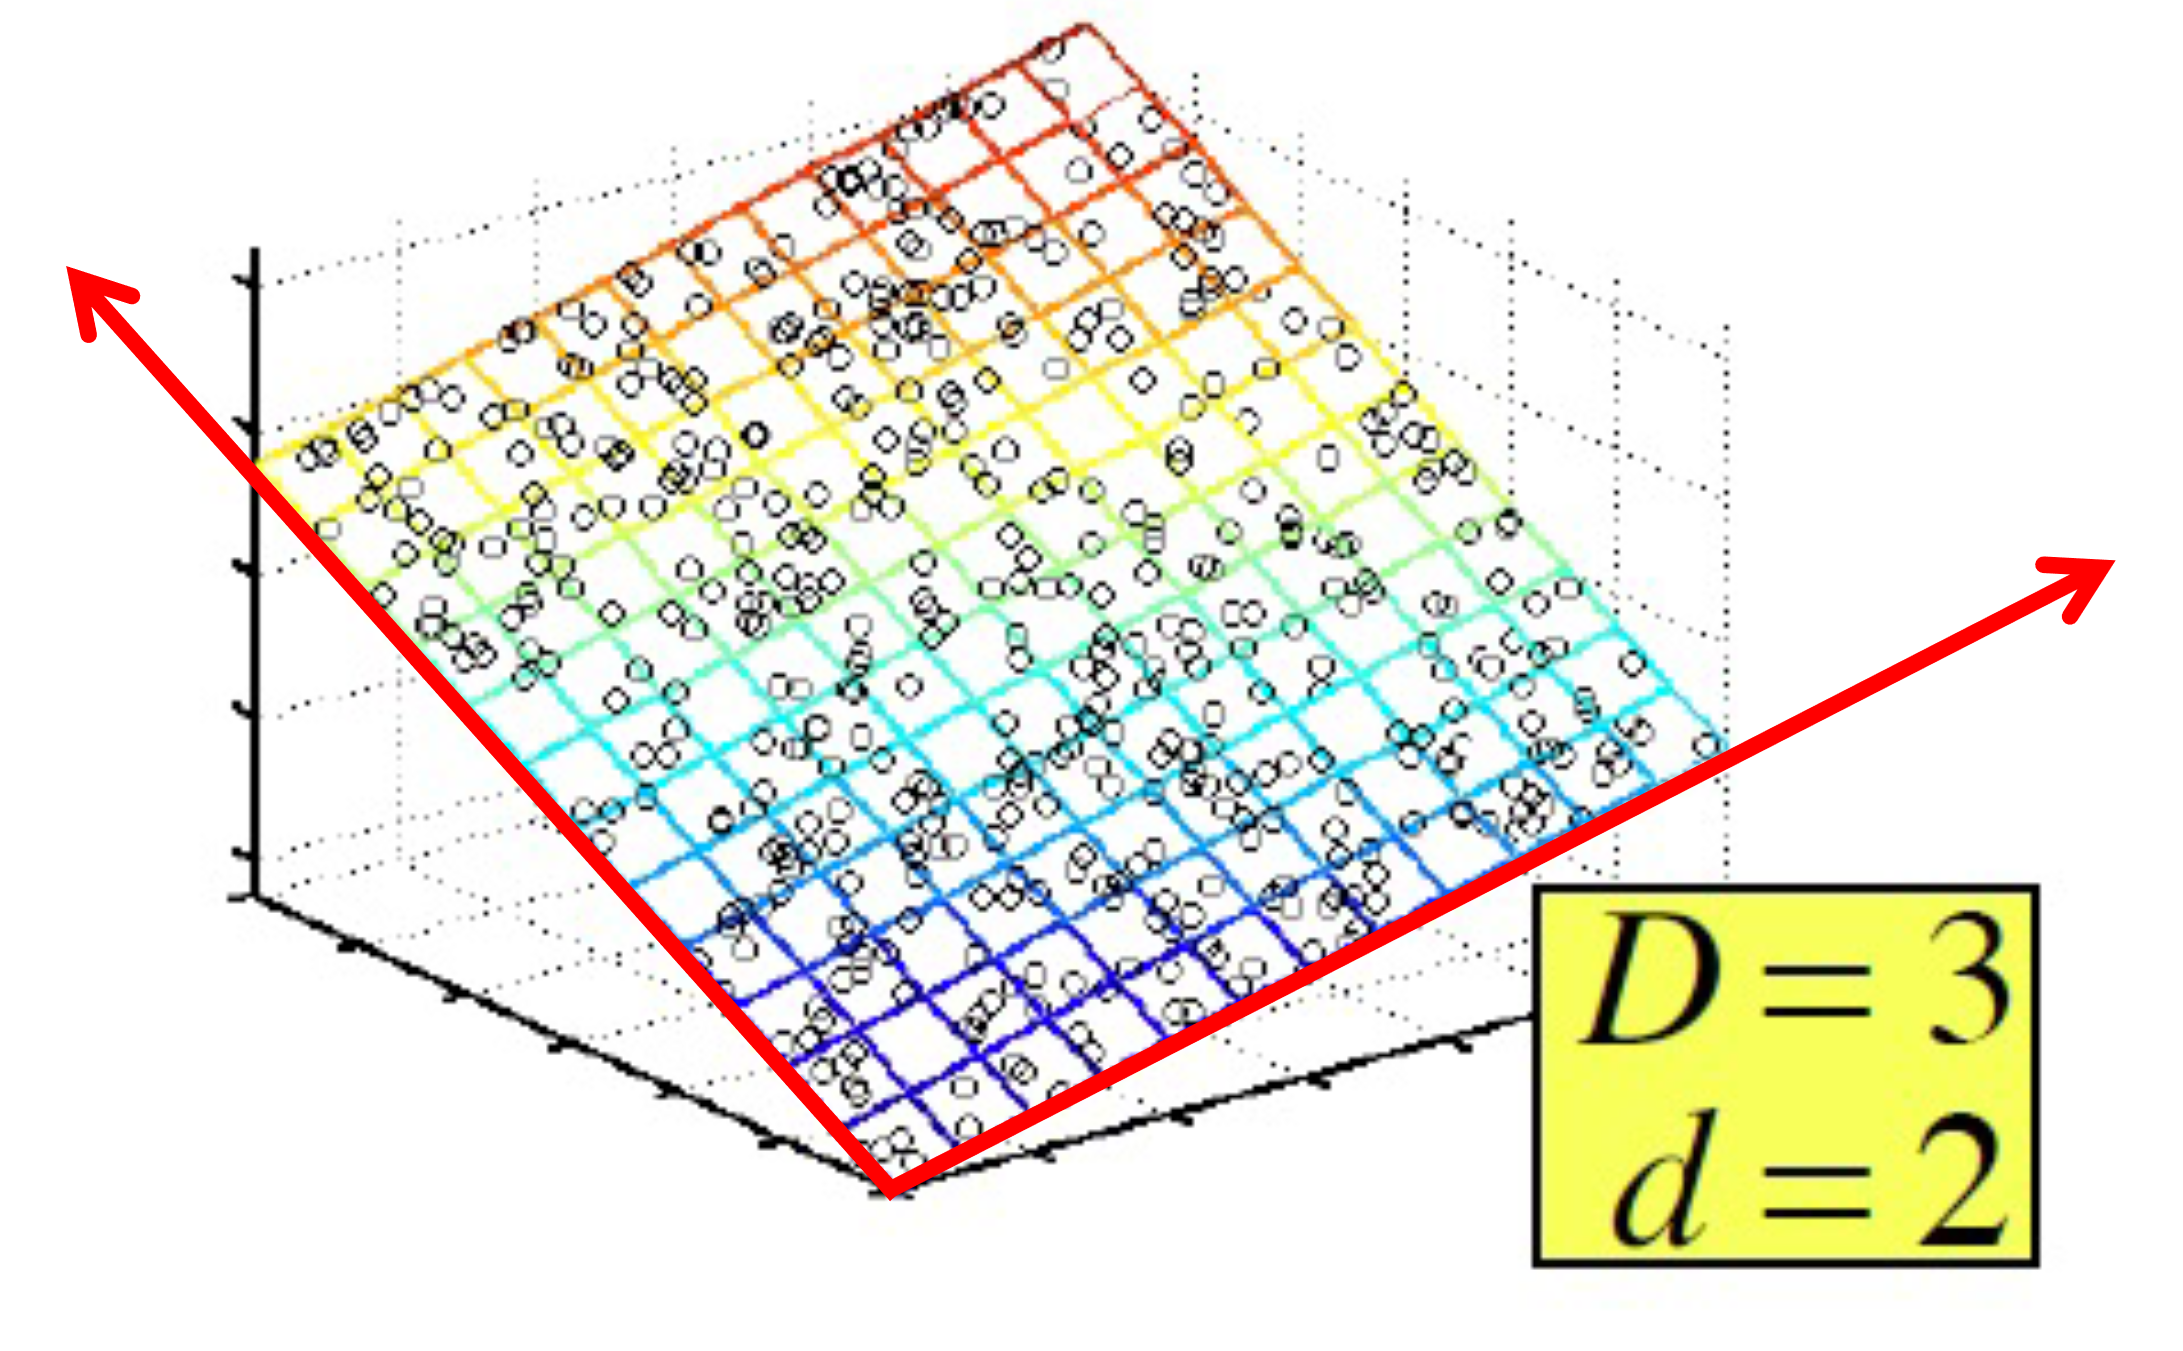

(4381, 23)


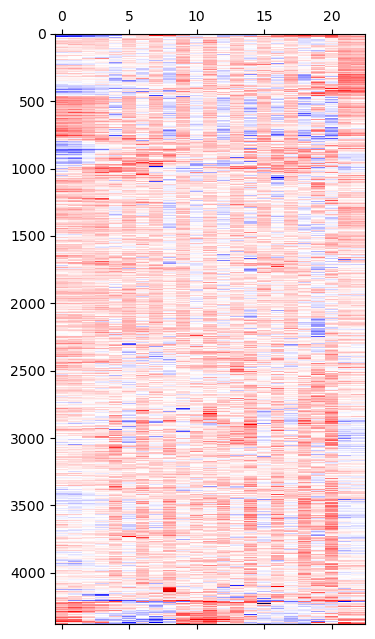

In [1]:
from matplotlib.pylab import cm
import numpy as np
import scipy.cluster.hierarchy as hclust
import matplotlib.pyplot as plt
data = np.genfromtxt('Spellman.csv',skip_header=1,delimiter=',')[:,1:]
Z = hclust.linkage(data,method='complete')
leaves = hclust.leaves_list(Z)
ordered = data[leaves]
print(data.shape)
plt.matshow(ordered,aspect=0.01,cmap=cm.seismic);

In [2]:
import pandas as pd
df = pd.read_csv('Spellman.csv');

In [3]:
print(df)

         time     40    50     60    70    80    90   100   110   120  ...  \
0     YAL001C -0.070 -0.23 -0.100  0.03 -0.04 -0.12 -0.28 -0.44 -0.09  ...   
1     YAL014C  0.215  0.09  0.025 -0.04 -0.04 -0.02 -0.51 -0.08  0.00  ...   
2     YAL016W  0.150  0.15  0.220  0.29 -0.10  0.15 -0.73  0.19 -0.15  ...   
3     YAL020C -0.350 -0.28 -0.215 -0.15  0.16 -0.12  0.26  0.00  0.13  ...   
4     YAL022C -0.415 -0.59 -0.580 -0.57 -0.09 -0.34  0.49  0.32  1.15  ...   
...       ...    ...   ...    ...   ...   ...   ...   ...   ...   ...  ...   
4376  YPR198W -0.060  0.08  0.210  0.34  0.65 -0.26  0.14 -0.33  0.53  ...   
4377  YPR199C  0.155  0.19  0.235  0.28 -0.26  0.21 -0.40  0.34 -0.80  ...   
4378  YPR201W -0.255 -0.36 -0.300 -0.24  1.30 -0.07  0.29 -0.20  0.25  ...   
4379  YPR203W  0.570  0.12 -0.070 -0.26 -0.44 -0.21 -1.08  0.39 -0.17  ...   
4380  YPR204W  0.405  0.17 -0.045 -0.26 -0.60 -0.09 -0.85  0.17 -0.05  ...   

       170   180   190   200   210   220   230   240   250    2

In [4]:
df.shape

(4381, 24)

In [5]:
print(df.columns)

Index(['time', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130',
       '140', '150', '160', '170', '180', '190', '200', '210', '220', '230',
       '240', '250', '260'],
      dtype='object')


In [14]:
# Remove time column
df_updated = df.iloc[:,1:]

In [15]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_result = pca_model.fit_transform(df_updated)

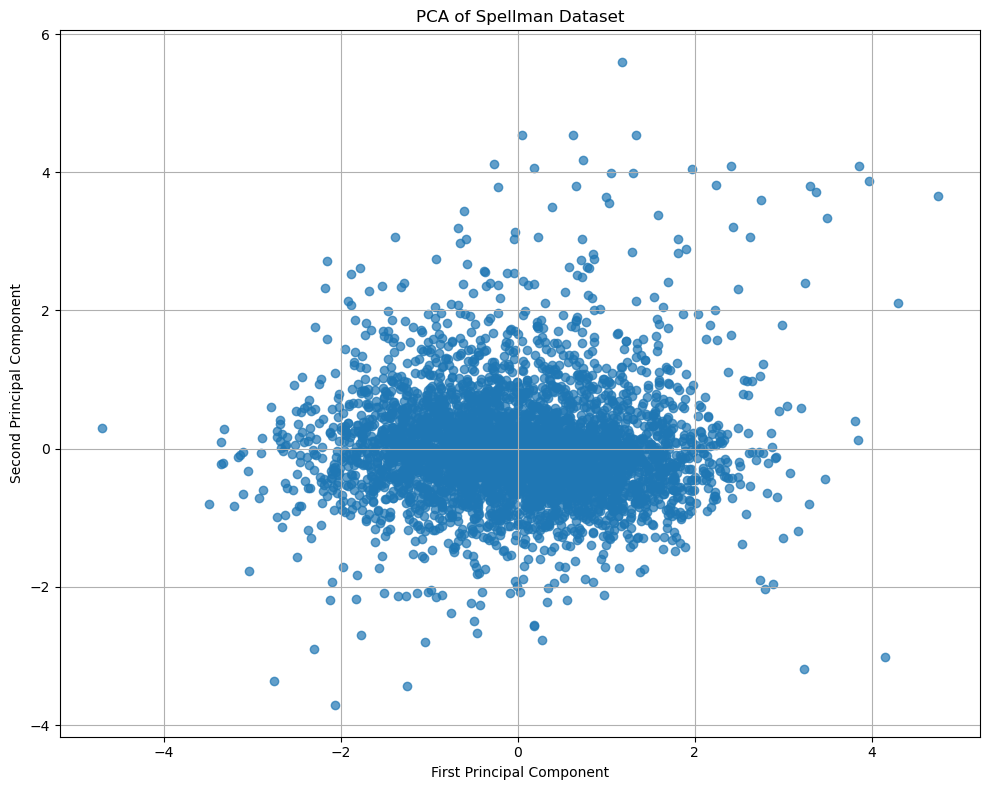

In [218]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Spellman Dataset')
plt.grid(True)

plt.tight_layout()
plt.show()

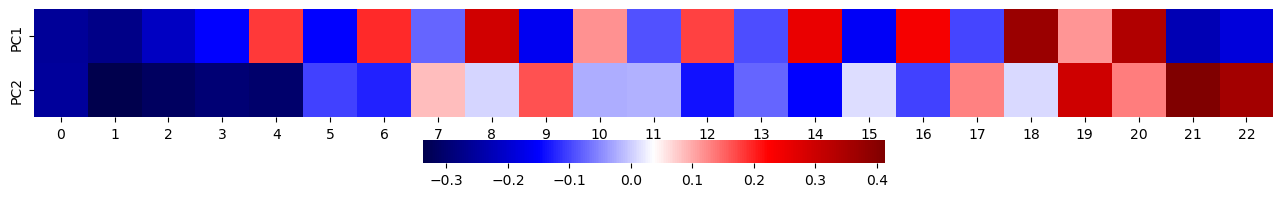

In [24]:
import seaborn as sns
plt.figure(figsize=(16,2))
sns.heatmap(pca_model.components_,cmap=cm.seismic,yticklabels=['PC1','PC2'],
            square=True, cbar_kws={"orientation": "horizontal"});

# So what is PCA doing
    - Standardize the dataset
    - Compute covariance matrix
    - Compute eigenvalues and eigenvectors
    - Identify the eigenvectors corresponding to the largest two eigenvalues.
    - Project data on the two eigenvectors.

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the data
data = pd.read_csv('Spellman.csv', index_col=0)
#X = data.values.T  # Transpose to have features as columns
X = data.values

In [210]:
# Step 2: Standardize the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [211]:
# Step 3: Compute covariance matrix
cov_matrix = np.cov(X_std.T)


In [212]:
# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [270]:
# Step 5: Sort eigenvectors by decreasing eigenvalues
eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) 
             for i in range(len(eigenvalues))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [267]:
print(eig_pairs[0])

(np.float64(6.171631270350201), array([ 0.21222343,  0.2245216 ,  0.24274254,  0.16998066, -0.19405505,
        0.17265513, -0.20169108,  0.11138725, -0.2627095 ,  0.19418624,
       -0.16503506,  0.10032566, -0.21425057,  0.11506152, -0.24079809,
        0.21440941, -0.23948284,  0.15819856, -0.33144565, -0.09588172,
       -0.29836715,  0.22770059,  0.21623486]))


In [266]:
for eigpair in eig_pairs:
    print(eigpair[0])

6.171631270350201
3.599301731069369
3.4859654637184536
1.583266927242173
1.412697526038927
0.8450324783616691
0.6829271691871974
0.6670304731154059
0.5730447434628692
0.5463811383327928
0.4761550214252927
0.4425195170065794
0.4228867949492685
0.38740666740499285
0.3548661217942501
0.3346801600944514
0.3058677478155608
0.27357651733291855
0.25712211012060365
0.1074163714311812
0.056205153073410646
0.019270038224951682
5.085642387525607e-16


In [271]:
# Step 6: Select the top two eigenvectors
top_eigenvectors = np.hstack((eig_pairs[0][1][:, np.newaxis], 
                              eig_pairs[1][1][:, np.newaxis]))

In [272]:
top_eigenvectors

array([[ 0.21222343,  0.32310283],
       [ 0.2245216 ,  0.33522963],
       [ 0.24274254,  0.2422595 ],
       [ 0.16998066,  0.03638956],
       [-0.19405505,  0.02528899],
       [ 0.17265513, -0.25999285],
       [-0.20169108, -0.15841746],
       [ 0.11138725, -0.37009189],
       [-0.2627095 , -0.12195311],
       [ 0.19418624, -0.04225073],
       [-0.16503506,  0.26047877],
       [ 0.10032566,  0.26680876],
       [-0.21425057,  0.27427921],
       [ 0.11506152,  0.22752912],
       [-0.24079809,  0.11779605],
       [ 0.21440941, -0.21143285],
       [-0.23948284, -0.0666741 ],
       [ 0.15819856, -0.34969106],
       [-0.33144565, -0.08018262],
       [-0.09588172, -0.05979833],
       [-0.29836715,  0.02168265],
       [ 0.22770059, -0.09415648],
       [ 0.21623486, -0.07463107]])

In [215]:
# Step 7: Project data onto the two principal components
X_pca = X_std.dot(top_eigenvectors)

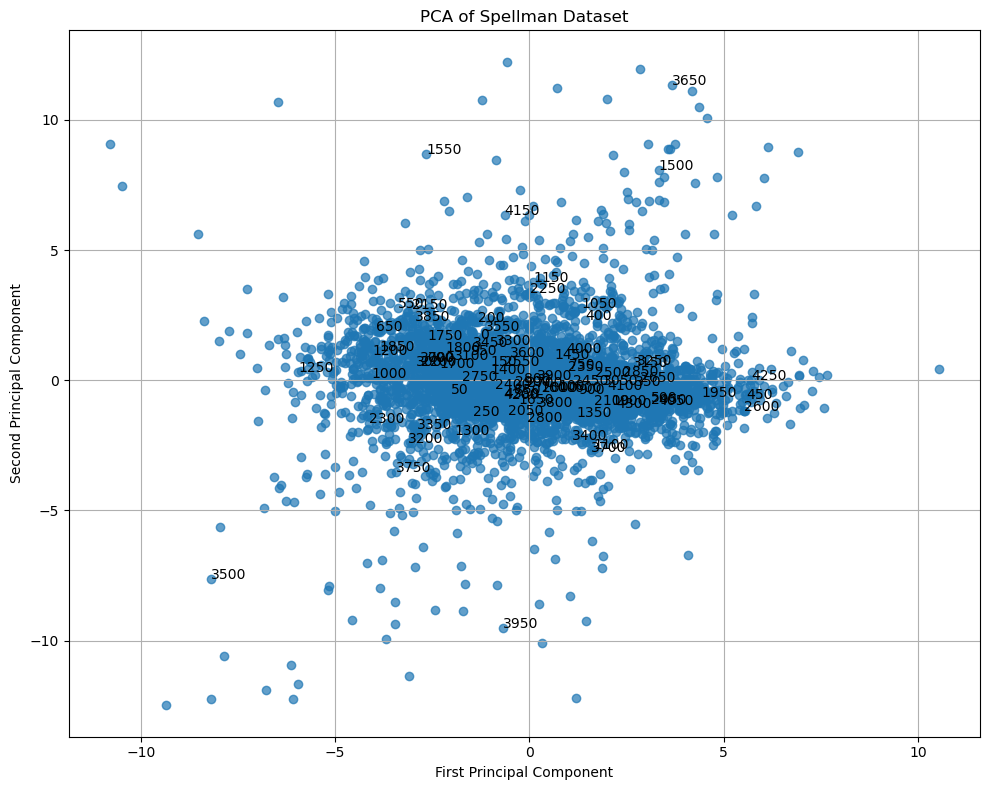

In [216]:
# Step 8: Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Spellman Dataset')
plt.grid(True)

# Add some point labels for reference (adjust as needed)
for i in range(0, len(X_pca), 50):  # Label every 50th point
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

plt.tight_layout()
plt.show()


In [274]:
# Print explained variance ratio
total_var = sum(eigenvalues)
explained_var_ratio = [i[0]/total_var for i in eig_pairs]
print(f"Explained variance ratio of the first two PCs: {explained_var_ratio[0]:.4f}, {explained_var_ratio[1]:.4f}")

Explained variance ratio of the first two PCs: 0.2683, 0.1565


# An image based Example: MNIST dataset

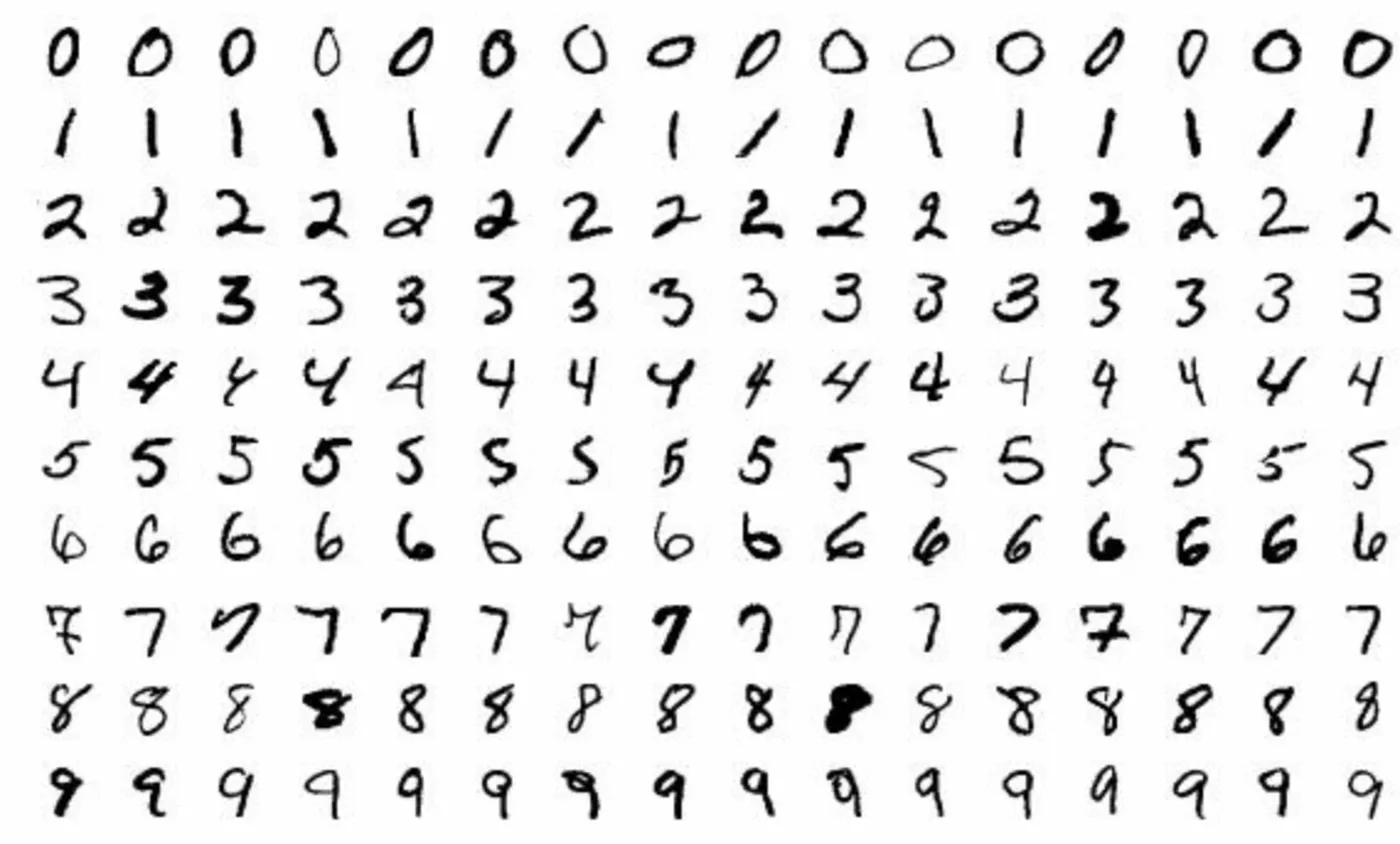

In [187]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist_data = mnist.data
mnist_label = mnist.target

In [195]:
print(mnist_data.shape)

(70000, 784)

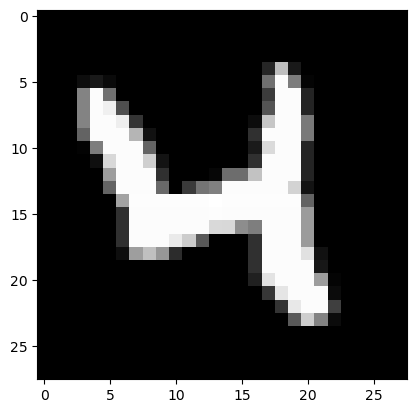

In [204]:
pixels = np.array(mnist_data.iloc[20]).reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [127]:
from sklearn.preprocessing import StandardScaler as ss
scaler = ss();
mnist_data_transform = scaler.fit_transform(mnist_data)

In [135]:
pca_mnist = PCA(n_components=2);
pca_mnist_results = pca_mnist.fit_transform(mnist_data_transform)

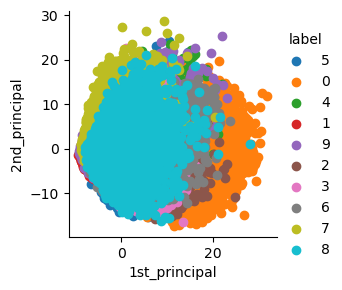

In [220]:
mnist_label2 = np.array(mnist_label).reshape(-1,1)
df_mnist = np.hstack((pca_mnist_results,mnist_label2))
sns.FacetGrid(pd.DataFrame(df_mnist,columns=("1st_principal", "2nd_principal", "label")), hue = "label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

# Linear Discrimant Analysis
Linear discriminant analysis (LDA) is an approach used in supervised machine learning to solve classification problems. LDA separates classes with multiple features through data dimensionality reduction. This technique is important as it can help in optimizing machine learning models.

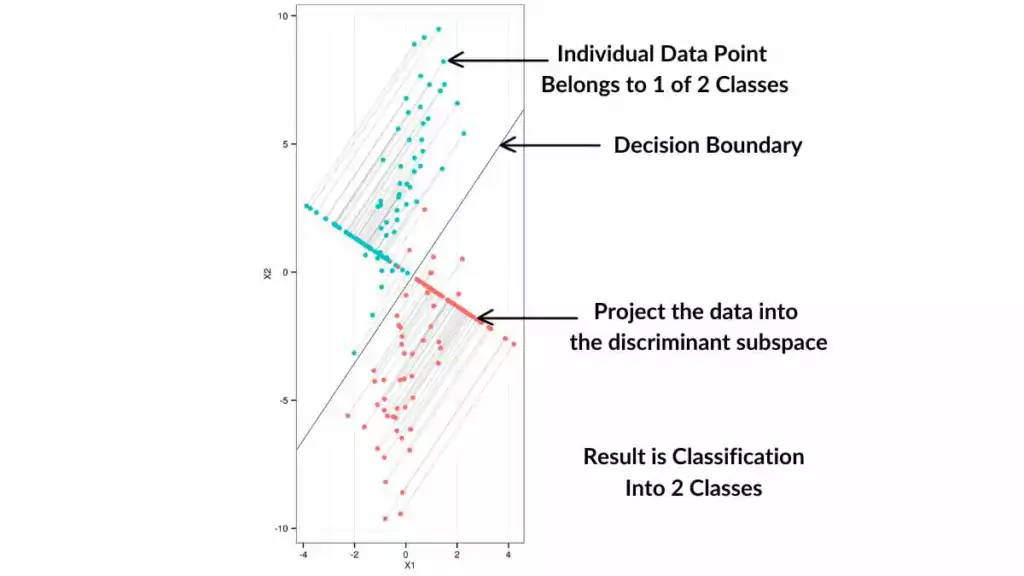

# PCA vs LDA

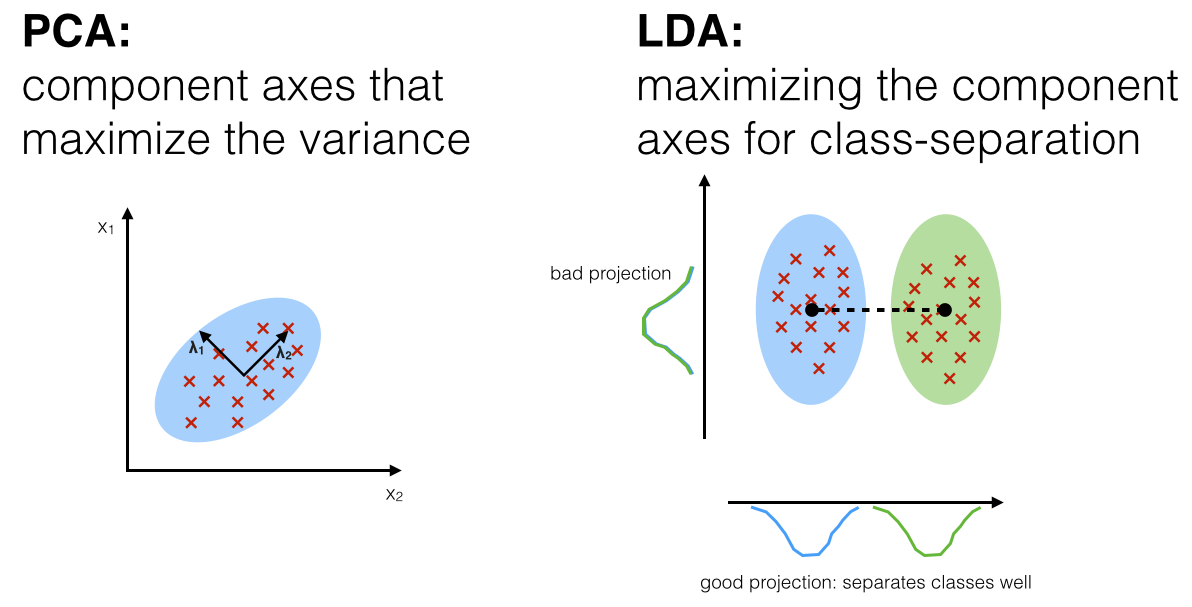

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [276]:
# Read and load the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Read the data set
dataset = pd.read_csv(url)

In [277]:
print(dataset)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


In [278]:
# Define column names
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset.columns = cls;
print(dataset)

     sepal-length  sepal-width  petal-length  petal-width           Class
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
144           6.7          3.0           5.2          2.3  Iris-virginica
145           6.3          2.5           5.0          1.9  Iris-virginica
146           6.5          3.0           5.2          2.0  Iris-virginica
147           6.2          3.4           5.4          2.3  Iris-virginica
148           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]


In [279]:
# Preprocess the data
# Divide the data set into features (X) and target variable (y)
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [280]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [281]:
y_original = le.inverse_transform(y)
print(y_original)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

# Perform exploratory data analysis
Before implementing LDA, lets look at the data a bit to get an idea of what is in it. We will perform exploratory analysis of the Iris data using a pair plot, histogram, and correlation heatmap.

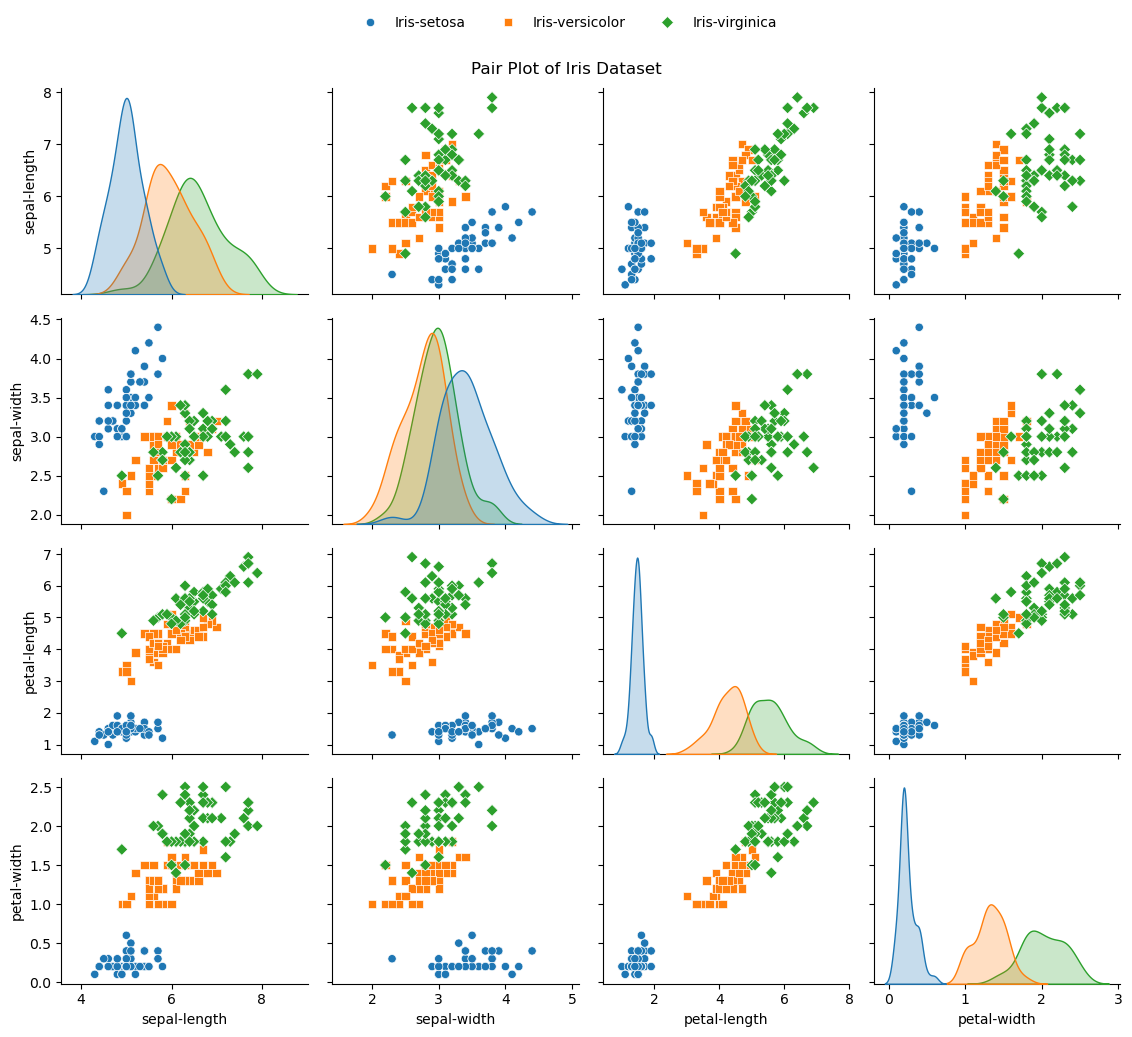

In [282]:
# Create a pair plot to visualize relationships between different features and species.
ax = sns.pairplot(dataset, hue='Class', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

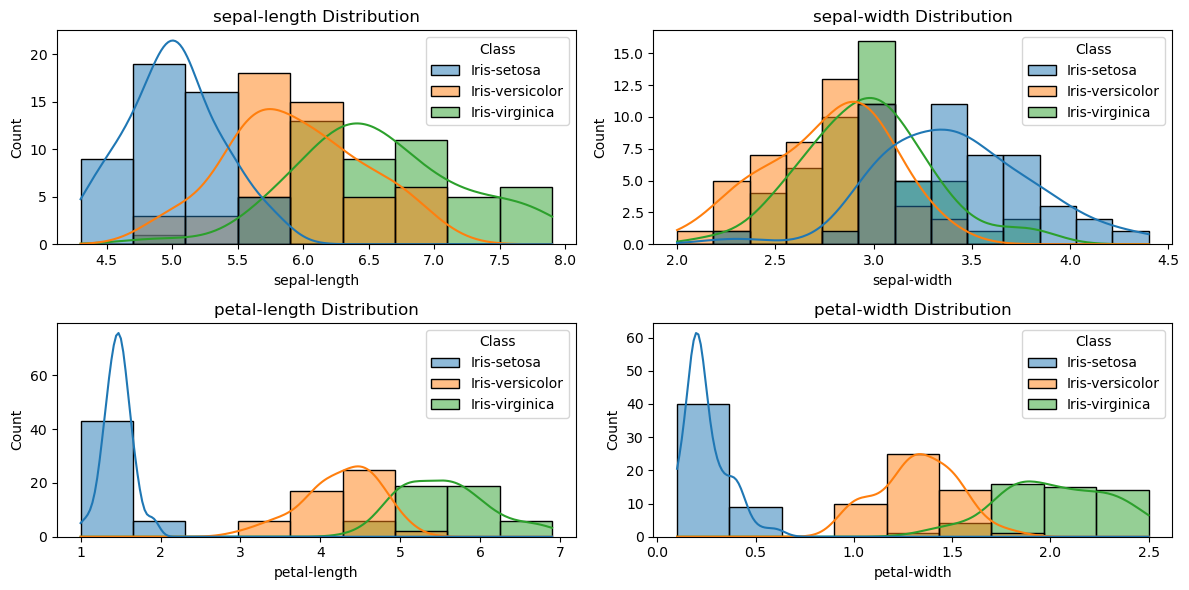

In [283]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(12, 6))
for i, feature in enumerate(cls[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=dataset, x=feature, hue='Class', kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

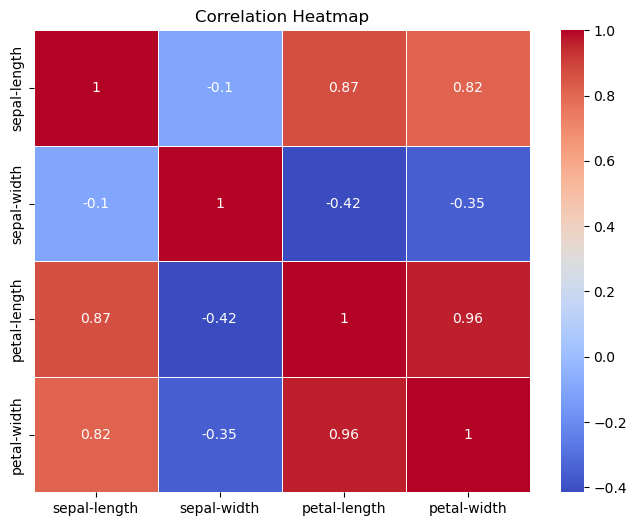

In [284]:
correlation_matrix = dataset.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [285]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_2 = lda.fit_transform(X, y)

In [286]:
print(X.shape)
print(X_2.shape)

(149, 4)
(149, 2)


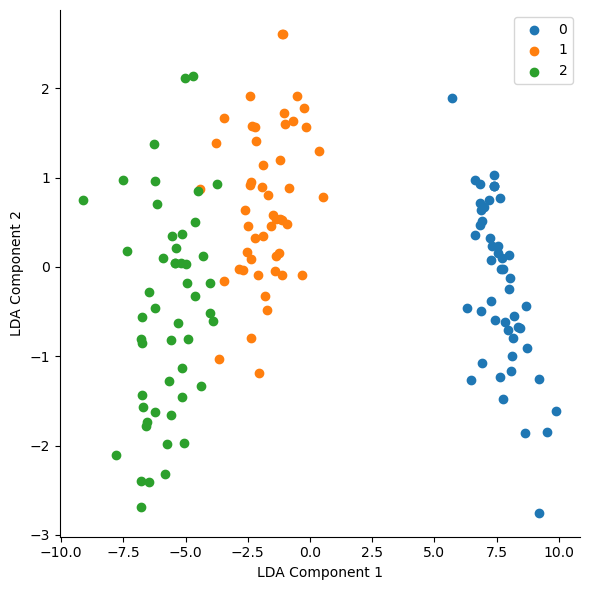

In [287]:
# Visualize data
tmp_Df = pd.DataFrame(X_2, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['Class']=y

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'LDA Component 1',
                              'LDA Component 2')

plt.legend(loc='upper right')